# Q.1 Support Vector Machine:

Data and other details are available at 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

Use the weblink and reproduce the result for SVM.

Implement SVM to classify the type of iris flower based on its sepal length and width using the iris dataset? 

Also try to use the scikit-learn digits dataset and an SVM to classify handwritten digits? 

For both datasets, provide a step-by-step code, including:  

    Loading the dataset 
    Visualizing the data 
    Splitting the data into training and testing sets 
    Initializing and training the SVM model 
    Testing the model 

# Step 1: Loading the Dataset

    The Iris dataset is included with scikit-learn

In [299]:
import numpy as np
from sklearn.datasets import load_iris
import pandas as pd

# Load dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
print(df)

# using only sepal length and sepal width
df = df[['sepal length (cm)', 'sepal width (cm)']]
df['Classes'] = iris.target
# print(df['Classes'][125])
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
     sepal length (cm)  sepal width (cm)

# Step 2: Visualizing the Data

    Visualizing our data to understand its distribution:

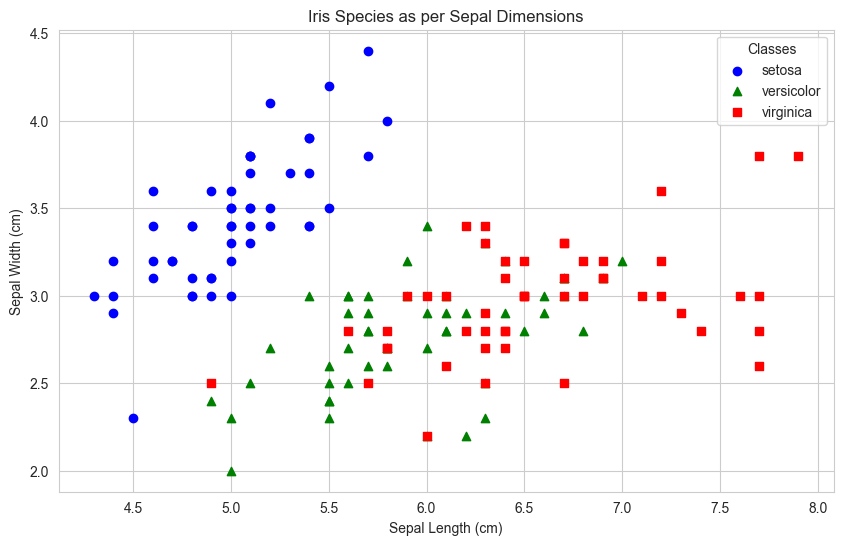

In [300]:
# Prepare to plot
plt.figure(figsize=(10, 6))

# Colors and markers for each class
colors = ['blue', 'green', 'red']
markers = ['o', '^', 's']  # Circle, Triangle up, Square

# Unique class labels
class_labels = iris.target_names

# Plot each class
for i, class_label in enumerate(np.unique(df['Classes'])):
    subset = df[df['Classes'] == class_label]
    plt.scatter(subset['sepal length (cm)'], subset['sepal width (cm)'],
                color=colors[i], label=class_labels[i], marker=markers[i])

# Adding labels and title
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Species as per Sepal Dimensions')
plt.legend(title='Classes')  # Show legend with class names

# Show the plot
plt.show()

# Step 3: Splitting the Data into Training and Testing Sets

    Before training our model, we need to split our data:

In [301]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = df[['sepal length (cm)', 'sepal width (cm)']]
y = df['Classes']

# Splitting dataset randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

     sepal length (cm)  sepal width (cm)
22                 4.6               3.6
15                 5.7               4.4
65                 6.7               3.1
11                 4.8               3.4
42                 4.4               3.2
..                 ...               ...
71                 6.1               2.8
106                4.9               2.5
14                 5.8               4.0
92                 5.8               2.6
102                7.1               3.0

[120 rows x 2 columns]
22     0
15     0
65     1
11     0
42     0
      ..
71     1
106    2
14     0
92     1
102    2
Name: Classes, Length: 120, dtype: int32
     sepal length (cm)  sepal width (cm)
73                 6.1               2.8
18                 5.7               3.8
118                7.7               2.6
78                 6.0               2.9
76                 6.8               2.8
31                 5.4               3.4
64                 5.6               2.9
141             

# Step 4: Initializing and Training the SVM Model

    Initializing the SVM model and training it:

In [302]:
from sklearn.svm import SVC

# Initialize the SVM classifier
model = SVC(kernel='linear')

# Train the model
model.fit(X_train, y_train)

SVC(kernel='linear')

# Step 5: Testing the Model

    Testing our model's performance:

In [303]:
from sklearn.metrics import accuracy_score, classification_report

# Predictions
y_pred = model.predict(X_test)
y_test_array = y_test.to_numpy()  # To convert the y_test pandas Series to a NumPy ndarray and to ignore the index column
print('The actual test labels: \n',y_test_array)
print('The predicted test labels: \n',y_pred)

# Accuracy
print("\nAccuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

The actual test labels: 
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
The predicted test labels: 
 [1 0 2 1 2 0 1 2 1 1 2 0 0 0 0 2 2 1 1 2 0 1 0 2 2 2 2 2 0 0]

Accuracy: 0.9

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



# For the scikit-learn digits dataset

# Step 1: Loading the Dataset

    Scikit-learn provides access to the digits dataset:

In [304]:
from sklearn.datasets import load_digits

# Load digits dataset
digits = load_digits()
print(digits.images.shape)  # 1797 images with pixel 8x8
print(digits.images)
print('\nThe last image of the dataset is: ')
print(digits.images[1796])  # last image

(1797, 8, 8)
[[[ 0.  0.  5. ...  1.  0.  0.]
  [ 0.  0. 13. ... 15.  5.  0.]
  [ 0.  3. 15. ... 11.  8.  0.]
  ...
  [ 0.  4. 11. ... 12.  7.  0.]
  [ 0.  2. 14. ... 12.  0.  0.]
  [ 0.  0.  6. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  5.  0.  0.]
  [ 0.  0.  0. ...  9.  0.  0.]
  [ 0.  0.  3. ...  6.  0.  0.]
  ...
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  0. ... 10.  0.  0.]]

 [[ 0.  0.  0. ... 12.  0.  0.]
  [ 0.  0.  3. ... 14.  0.  0.]
  [ 0.  0.  8. ... 16.  0.  0.]
  ...
  [ 0.  9. 16. ...  0.  0.  0.]
  [ 0.  3. 13. ... 11.  5.  0.]
  [ 0.  0.  0. ... 16.  9.  0.]]

 ...

 [[ 0.  0.  1. ...  1.  0.  0.]
  [ 0.  0. 13. ...  2.  1.  0.]
  [ 0.  0. 16. ... 16.  5.  0.]
  ...
  [ 0.  0. 16. ... 15.  0.  0.]
  [ 0.  0. 15. ... 16.  0.  0.]
  [ 0.  0.  2. ...  6.  0.  0.]]

 [[ 0.  0.  2. ...  0.  0.  0.]
  [ 0.  0. 14. ... 15.  1.  0.]
  [ 0.  4. 16. ... 16.  7.  0.]
  ...
  [ 0.  0.  0. ... 16.  2.  0.]
  [ 0.  0.  4. ... 16.  2.  0.]
  [ 0.  0.  5. 

# Step 2: Visualizing the Data

    Visualizing our data to understand its distribution:

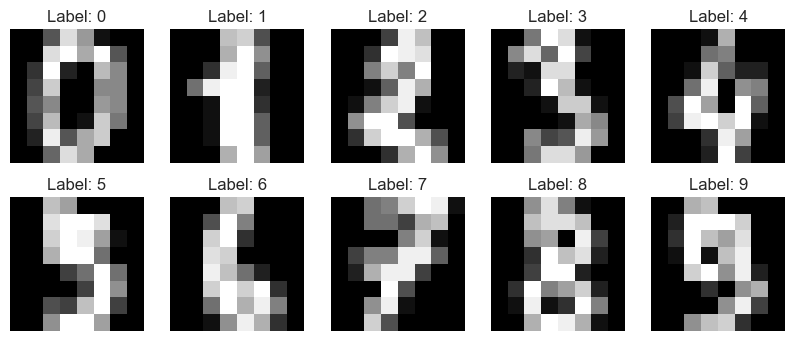

In [305]:
import matplotlib.pyplot as plt 

# Set up the figure size
plt.figure(figsize=(10, 4))

# Display the first few images and labels
for i in range(10): # show 10 images
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f'Label: {digits.target[i]}')
    plt.axis('off')
plt.show()

# Step 3: Splitting the Data into Training and Testing Sets

    Before training our model, we need to split our data:

In [306]:
from sklearn.model_selection import train_test_split

# Features and labels
X = digits.data    # Images, flattened
y = digits.target  # Corresponding labels
print(X)   # shape of X is (1797, 64) means we have 1797 images with pixel size: 8x8
print(y)   # shape of y is (1797,) gives 1797 labels

# Splitting the data - 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)  # 1437 images: 80% of the images
print(X_test.shape)   # reamining 360 images: 20% of the images

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]
(1437, 64)
(360, 64)


# Step 4: Initializing and Training the SVM Model

    Initializing the SVM model and training it:

In [307]:
from sklearn.svm import SVC

# Initialize SVM classifier
# 'rbf': Radial basis function kernel, useful for non-linear data where the boundary might be curved
model = SVC(kernel='rbf', gamma=0.001, C=100) # gamma=0.001 is relatively low, indicating a model that is trying not to overfit by making the decision boundary relatively smooth and generalized
                                    # C=100 is quite high, indicating that the SVM is being instructed to classify as many training examples correctly as possible, even at the risk of a more complex boundary that could overfit.
# Train the model
model.fit(X_train, y_train)


SVC(C=100, gamma=0.001)

# Step 5: Testing the Model

    Testing our model's performance:

In [308]:
from sklearn.metrics import accuracy_score, classification_report

# Making predictions
y_pred = model.predict(X_test)
print(y_pred.shape)
# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


(360,)
Accuracy: 0.9888888888888889

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      1.00      1.00        30
           9       0.97      0.97      0.97        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



# Showing the Prediction result for 10 random test images

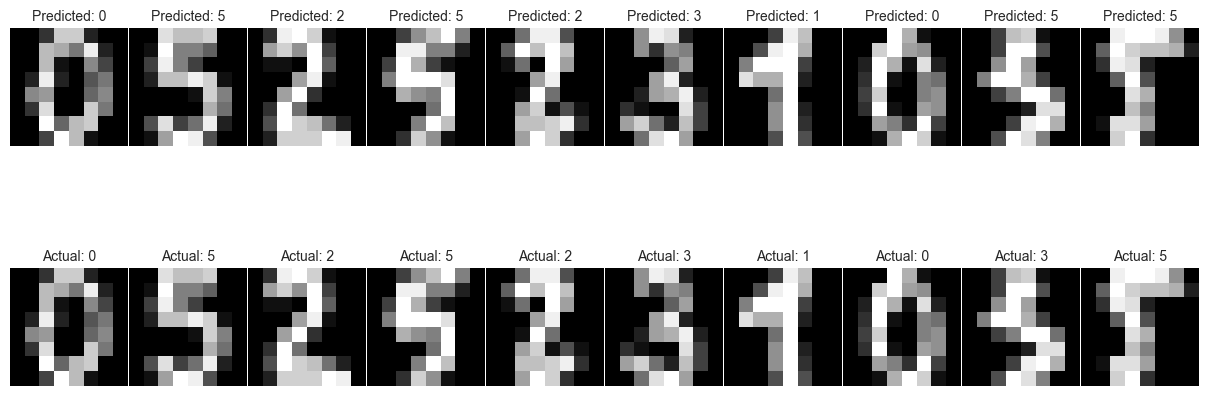

In [309]:
import matplotlib.pyplot as plt
import numpy as np

# Number of images to display
num_images = 10

# Set up the figure size for plotting
plt.figure(figsize=(12, num_images * 0.6))

# Randomly select some indices to display images from the test dataset
indices = np.random.choice(len(X_test), num_images, replace=False)

# Loop through the selected indices to plot images and their predicted/actual labels
for i, index in enumerate(indices):
    # Create a subplot for the predicted labels
    ax = plt.subplot(2, num_images, i + 1) # 2 rows, num_images columns, current plot position i+1
    plt.imshow(X_test[index].reshape(8, 8), cmap='gray') # Reshape and display image
    plt.title(f"Predicted: {y_pred[index]}", fontsize=10) # Show predicted label above the image
    plt.axis('off') # Turn off the axis labels and ticks

    # Create a subplot for the actual labels directly below the predictions
    ax = plt.subplot(2, num_images, i + 1 + num_images) # 2 rows, num_images columns, position for the second row
    plt.imshow(X_test[index].reshape(8, 8), cmap='gray') # Reshape and display the same image
    plt.title(f"Actual: {y_test[index]}", fontsize=10) # Show actual label below the image
    plt.axis('off')

plt.tight_layout(pad=0.4, h_pad=0.2, w_pad=0.1)  # h_pad controls the height padding between subplots
plt.show() # Display the plot


# Q. 2 Principal Component Analysis:

    To do PCA, use the Eigen decomposition available in numpy. The dataset can be obtained from https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_3d.html#sphx-glr-auto-examples-decomposition-plot-pca-3d-py. 
    
    DO NOT USE the code available for PCA in the same link (as mentioned above, use numpy's Eigen decomposition). 
    
    Compare your results with the one available in the link (here, you are free to use the code available in the link to generate any numbers for comparison). 
    
    Are you getting the same result?


# Step 1: Load the Iris Dataset

In [310]:
# Import necessary libraries
from sklearn.datasets import load_iris  # Scikit-learn function to load datasets
import pandas as pd  # Import pandas for data manipulation

# Load the Iris dataset
iris = load_iris()  # 'iris' now contains the dataset with features, target values, and other metadata

# Extract the feature matrix (input variables)
X = iris.data  # 'X' holds the measurements of the iris flowers in a NumPy array format
print(X)
print(X.shape)

# Extract the target array (output variable)
y = iris.target  # 'y' holds the species of each iris flower as integers
print(y)

# Get feature names from the dataset
feature_names = iris.feature_names  # 'feature_names' contains the names of the features (e.g., sepal length, sepal width)


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

# Step 2: Standardize the Dataset


In [311]:
# Standardizing each feature individually
X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
print(X_std)
print(X_std.shape)

[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

# Step 3: Computing the Covariance Matrix


In [312]:
import numpy as np

# Compute the covariance matrix
cov_mat = np.cov(X_std.T)  # making rows into columns for proper covariance computation
print(cov_mat.shape)
print(cov_mat)

(4, 4)
[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


# Step 4: Eigen Decomposition


In [313]:
# Calculate eigenvalues and eigenvectors of the covariance matrix
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

# the eigenvalues to see the variance explained by each principal component
print("Eigenvalues:\n", eigen_vals)

Eigenvalues:
 [2.93808505 0.9201649  0.14774182 0.02085386]


# Step 5: Selecting Principal Components


In [314]:
# a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low by eigenvalue
eigen_pairs.sort(key=lambda x: x[0], reverse=True)
print(eigen_pairs)

# Construct the projection matrix W from the top three eigenvectors
w = np.hstack((eigen_pairs[0][1].reshape(4,1), 
               eigen_pairs[1][1].reshape(4,1),
               eigen_pairs[2][1].reshape(4,1)))
print('\n',w)
print('\n',w.shape)

[(2.938085050199992, array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])), (0.9201649041624863, array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])), (0.14774182104494765, array([-0.71956635,  0.24438178,  0.14212637,  0.63427274])), (0.020853862176462543, array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))]

 [[ 0.52106591 -0.37741762 -0.71956635]
 [-0.26934744 -0.92329566  0.24438178]
 [ 0.5804131  -0.02449161  0.14212637]
 [ 0.56485654 -0.06694199  0.63427274]]

 (4, 3)


# Step 6: Projection Onto the New Feature Space


In [315]:
# Transform the input dataset using the projection matrix W
X_pca = X_std.dot(w)
print(X_pca)
print(X_pca.shape)

[[-2.26470281 -0.4800266  -0.12770602]
 [-2.08096115  0.67413356 -0.23460885]
 [-2.36422905  0.34190802  0.04420148]
 [-2.29938422  0.59739451  0.09129011]
 [-2.38984217 -0.64683538  0.0157382 ]
 [-2.07563095 -1.48917752  0.02696829]
 [-2.44402884 -0.0476442   0.3354704 ]
 [-2.23284716 -0.22314807 -0.0886955 ]
 [-2.33464048  1.11532768  0.14507686]
 [-2.18432817  0.46901356 -0.25376557]
 [-2.1663101  -1.04369065 -0.2686811 ]
 [-2.32613087 -0.13307834  0.09375924]
 [-2.2184509   0.72867617 -0.23091124]
 [-2.6331007   0.96150673  0.18079608]
 [-2.1987406  -1.86005711 -0.472901  ]
 [-2.26221453 -2.68628449  0.03052661]
 [-2.2075877  -1.48360936 -0.00534409]
 [-2.19034951 -0.48883832 -0.04421532]
 [-1.898572   -1.40501879 -0.37434327]
 [-2.34336905 -1.12784938  0.13263047]
 [-1.914323   -0.40885571 -0.42129259]
 [-2.20701284 -0.92412143  0.15986528]
 [-2.7743447  -0.45834367  0.3321791 ]
 [-1.81866953 -0.08555853  0.0344886 ]
 [-2.22716331 -0.13725446  0.11799354]
 [-1.95184633  0.62561859

# Visualization of the PCA-transformed Data by numpy's Eigen decomposition


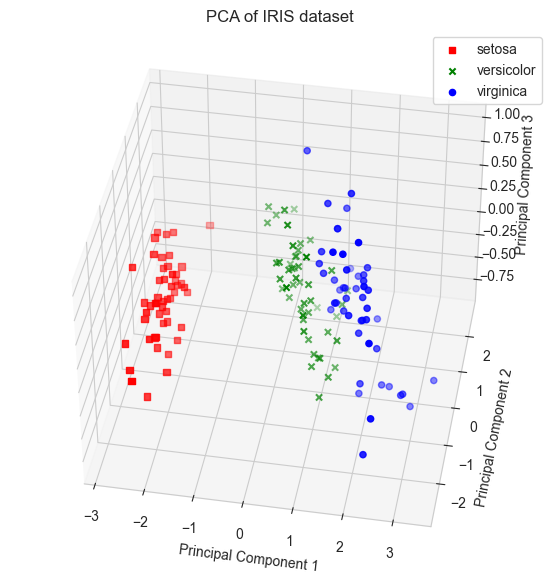

In [316]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Create a new figure with specific size
fig = plt.figure(figsize=(10, 7))
# Add a 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Color mapping and markers for each iris species
colors = ['r', 'g', 'b']
markers = ['s', 'x', 'o']

# Plot each class with its own color and marker
for l, c, m in zip(np.unique(y), colors, markers):
    ax.scatter(X_pca[y==l, 0], X_pca[y==l, 1], X_pca[y==l, 2], c=c, label=iris.target_names[l], marker=m)

# Set the title and labels for each axis
ax.set_title('PCA of IRIS dataset')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
# View the plot from a different angle by setting the elevation and azimuth
ax.view_init(elev=40, azim=280) # elev = 20 degrees, azim = 100 degrees

plt.show()


# Visualization of the PCA-transformed Data by the given link

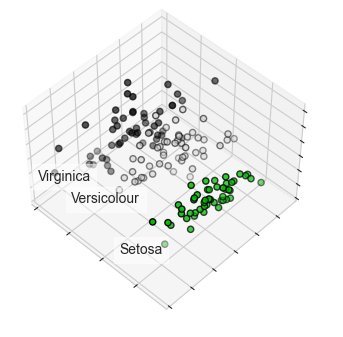

In [317]:
# Code source: Gaël Varoquaux
# License: BSD 3 clause

import matplotlib.pyplot as plt

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
import numpy as np

from sklearn import datasets, decomposition

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(4, 3))
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])


plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()

# Comparing both the result::

       So by seeing both the 3d scatter plot we can conclude that both the plots are same.

       Hence we are getting the same result by using numpy's Eigen decomposition and the provided link.

# Now PCA for the digits dataset

# Step 1: Loading the digits dataset:

In [318]:
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target


# Step 2: Standardizing the Data


In [319]:
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(X)


# Step 3: Computing the Covariance Matrix


In [320]:
import numpy as np

cov_mat = np.cov(X_std.T)
print(cov_mat.shape)

(64, 64)


# Step 4: Eigen Decomposition


In [321]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print("Eigenvalues:\n", eigen_vals)

Eigenvalues:
 [7.34477606 5.83549054 5.15396118 3.96623597 2.9663452  2.57204442
 2.40600941 2.06867355 1.82993314 1.78951739 1.69784616 1.57287889
 1.38870781 1.35933609 1.32152536 1.16829176 1.08368678 0.99977862
 0.97438293 0.90891242 0.82271926 0.77631014 0.71155675 0.64552365
 0.59527399 0.5765018  0.52673155 0.5106363  0.48686381 0.45560107
 0.44285155 0.42230086 0.3991063  0.39110111 0.36094517 0.34860306
 0.3195963  0.29406627 0.05037444 0.27692285 0.06328961 0.258273
 0.24783029 0.2423566  0.07635394 0.08246812 0.09018543 0.09840876
 0.10250434 0.11188655 0.11932898 0.12426371 0.13321081 0.14311427
 0.217582   0.15818474 0.16875236 0.20799593 0.17612894 0.2000909
 0.18983516 0.         0.         0.        ]


# Step 5: Selecting Principal Components


In [322]:
# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key=lambda x: x[0], reverse=True)

# Collect the top 3 eigenvectors
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], 
               eigen_pairs[1][1][:, np.newaxis], 
               eigen_pairs[2][1][:, np.newaxis]))

# Transform the dataset
X_pca = X_std.dot(w)
print(X_pca)
print(X_pca.shape)

[[-1.91421366  0.95450157 -3.94603482]
 [-0.58898033 -0.9246358   3.92475494]
 [-1.30203906  0.31718883  3.02333293]
 ...
 [-1.02259599  0.14791087  2.46997365]
 [-1.07605522  0.38090625 -2.45548693]
 [ 1.25770233  2.22759088  0.28362789]]
(1797, 3)


# Step 6: 3D Visualization of the PCA-transformed Data


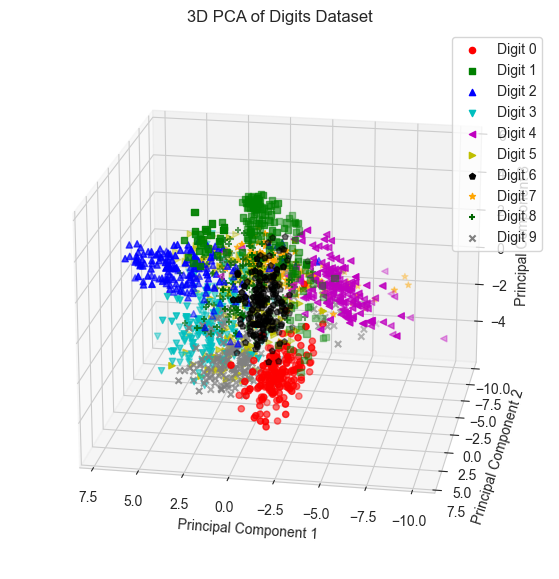

In [323]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Colors and markers
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'darkgreen', 'gray']
markers = ['o', 's', '^', 'v', '<', '>', 'p', '*', '+', 'x']

for i in range(len(colors)):
    ax.scatter(X_pca[y == i, 0], X_pca[y == i, 1], X_pca[y == i, 2], c=colors[i], label=f'Digit {i}', marker=markers[i])

ax.set_title('3D PCA of Digits Dataset')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
# View the plot from a different angle by setting the elevation and azimuth
ax.view_init(elev=20, azim=100) # elev = 20 degrees, azim = 120 degrees

plt.show()
